In [1]:
import pandas as pd
import numpy as np
import itertools
from functools import lru_cache
import matplotlib.pyplot as plt

In [2]:
n_items = 14
k = 2
n_clusters = 2
cluster_sizes = n_items//n_clusters

np.random.seed(42)

mean_seq = np.random.rand(n_clusters)

qualities = np.repeat(mean_seq, cluster_sizes, axis=0)
qualities += np.random.normal(scale=0.01, size=qualities.shape)
np.random.shuffle(qualities)
print(mean_seq)
print(qualities)

[0.37454012 0.95071431]
[0.38977042 0.93346513 0.94608013 0.38221447 0.39033225 0.94509143
 0.381017   0.95613991 0.37219875 0.36984537 0.37219859 0.9315815
 0.94605701 0.95313393]


In [ ]:
def generate_sequences(arr, k):
    # Convert the input to a tuple for consistent ordering and caching
    arr = tuple(arr)
    
    @lru_cache(maxsize=None)
    def helper(remaining):
        # remaining is a tuple of available items
        if not remaining:
            # Base case: no items remain → one valid (empty) partition.
            return ((),)  # A tuple containing an empty tuple
        sequences = []
        # Iterate over all k-combinations from remaining items.
        for comb in itertools.combinations(remaining, k):
            # Create a set from comb for fast membership testing.
            set_comb = set(comb)
            # Build new_remaining by filtering out items in comb.
            new_remaining = tuple(x for x in remaining if x not in set_comb)
            # For each valid partition of the new_remaining items,
            # prepend the current combination.
            for seq in helper(new_remaining):
                sequences.append((comb,) + seq)
        return tuple(sequences)
    
    # Generate all partitions from the full set of items.
    all_seq = helper(arr)
    return np.array(all_seq, dtype=object)


# Example usage:
n_items = 14
k = 2
all_sequences = generate_sequences(range(n_items), k)
print(f"Number of sequences for {n_items} items and groups of {k}: {len(all_sequences)}")


In [ ]:
# # Function to generate sequences without replacement
# def generate_sequences(arr, k):
#     def helper(remaining, current_sequence):
#         if not remaining:
#             sequences.append(current_sequence)
#             return
#         for comb in itertools.combinations(remaining, k):
#             new_remaining = [x for x in remaining if x not in comb]
#             new_sequence = current_sequence + [comb]
#             helper(new_remaining, new_sequence)

#     sequences = []
#     helper(arr, [])
#     return np.array(sequences, dtype=object)

# n_items = 12
# k = 2
# all_sequences = generate_sequences(range(n_items), k)
# print(f"n sequences: {len(all_sequences)}")

n sequences: 7484400


In [4]:
means = qualities[all_sequences].mean(axis=2)
mean_diffs = np.insert(abs(np.diff(means, axis=1)), 0, 0, axis=1)
vars = qualities[all_sequences].var(axis=2)

rewards = -vars-mean_diffs
total_rewards = rewards.sum(axis=1)

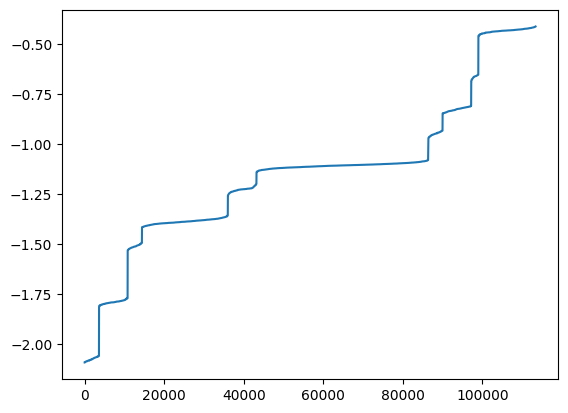

In [7]:
plt.plot(sorted(total_rewards))
plt.show()

In [27]:
arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])

# Get sorted indices
sorted_indices = np.argsort(arr)
arr[sorted_indices]

array([1, 1, 2, 3, 3, 4, 5, 5, 5, 6, 9])

In [49]:
selected_sequences

array([[[4, 5],
        [1, 3],
        [6, 8],
        [0, 9],
        [2, 7]],

       [[2, 7],
        [0, 9],
        [6, 8],
        [1, 3],
        [4, 5]],

       [[2, 7],
        [0, 9],
        [3, 8],
        [1, 6],
        [4, 5]],

       [[4, 5],
        [1, 6],
        [3, 8],
        [0, 9],
        [2, 7]],

       [[5, 9],
        [1, 3],
        [6, 8],
        [0, 4],
        [2, 7]]], dtype=object)

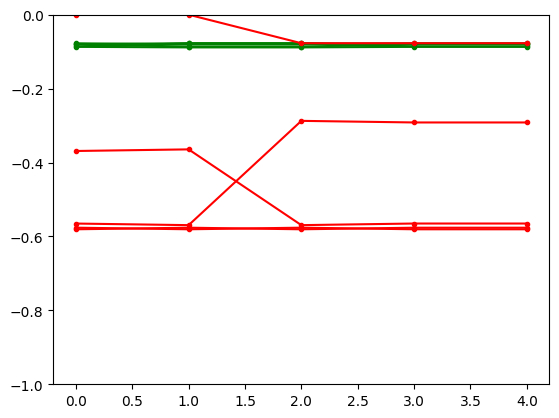

In [56]:
top_seq_ind = np.argsort(total_rewards)[::-1][:5]
#selected_sequences = all_sequences[top_seq_ind]
#selected_values = np.array([[qualities[list(grp)] for grp in seq] for seq in selected_sequences])
flop_seq_ind = np.argsort(total_rewards)[:5]

plt.plot(rewards[top_seq_ind], marker='.', color='g')
plt.plot(rewards[flop_seq_ind], marker='.', color='r')
plt.ylim(-1,0)
plt.show()

In [47]:
selected_sequences = all_sequences[top_seq_ind]
selected_values = np.array([[qualities[list(grp)] for grp in seq] for seq in selected_sequences])